## Day 29 Lecture 1 Assignment

In this assignment, we will learn about decision trees. We will use the Chicago salary dataset loaded below.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
import graphviz
from IPython.display import Image

In [2]:
chicago = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Current_Employee_Names__Salaries__and_Position_Titles.csv')

In [3]:
chicago.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"ALLISON, PAUL W",LIEUTENANT,FIRE,F,Salary,NaN,$107790.00,NaN
1,"BRUNO, KEVIN D",SERGEANT,POLICE,F,Salary,NaN,$104628.00,NaN
2,"COOPER, JOHN E",LIEUTENANT-EMT,FIRE,F,Salary,NaN,$114324.00,NaN
3,"CRESPO, VILMA I",STAFF ASST,LAW,F,Salary,NaN,$76932.00,NaN
4,"DOLAN, ROBERT J",SERGEANT,POLICE,F,Salary,NaN,$111474.00,NaN


To simplify this problem, we will limit our model to only salary employees. Create a new dataset that does not contain any hourly employees.

In [4]:
# answer below:
chicago_sal = chicago[chicago['Salary or Hourly'] == 'Salary']

chicago_sal


,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"ALLISON, PAUL W",LIEUTENANT,FIRE,F,Salary,NaN,$107790.00,NaN
1,"BRUNO, KEVIN D",SERGEANT,POLICE,F,Salary,NaN,$104628.00,NaN
2,"COOPER, JOHN E",LIEUTENANT-EMT,FIRE,F,Salary,NaN,$114324.00,NaN
3,"CRESPO, VILMA I",STAFF ASST,LAW,F,Salary,NaN,$76932.00,NaN
4,"DOLAN, ROBERT J",SERGEANT,POLICE,F,Salary,NaN,$111474.00,NaN
...,...,...,...,...,...,...,...,...
32653,"ZYGOWICZ, PETER J",POLICE OFFICER,POLICE,F,Salary,NaN,$90024.00,NaN
32654,"ZYLINSKA, KATARZYNA",POLICE OFFICER,POLICE,F,Salary,NaN,$48078.00,NaN
32655,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,$87006.00,NaN
32656,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,$93354.00,NaN


Next, we will look at the count of all values for both job titles and department to ensure that we don't use features that are too sparse in our model.

In [5]:
chicago_sal['Job Titles'].value_counts()

POLICE OFFICER                            9393
FIREFIGHTER-EMT                           1424
SERGEANT                                  1118
POLICE OFFICER (ASSIGNED AS DETECTIVE)     845
FIREFIGHTER                                564
                                          ... 
CITY COMPTROLLER                             1
DIR OF LICENSE ISSUANCE                      1
SUPVR OF POLLING-ELECTIONS                   1
CHIEF HELICOPTER PILOT/EMT                   1
ARCHITECT II                                 1
Name: Job Titles, Length: 954, dtype: int64

In [6]:
# answer below:

chicago_sal['Department'].value_counts().sort_values()

LICENSE APPL COMM            1
POLICE BOARD                 2
BOARD OF ETHICS              8
HUMAN RELATIONS             17
COPA                        17
TREASURER                   23
DISABILITIES                29
ADMIN HEARNG                38
BUDGET & MGMT               43
IPRA                        56
ANIMAL CONTRL               57
INSPECTOR GEN               63
CULTURAL AFFAIRS            66
HUMAN RESOURCES             67
MAYOR'S OFFICE              78
PROCUREMENT                 82
CITY CLERK                  82
DoIT                       101
BOARD OF ELECTION          112
BUSINESS AFFAIRS           160
GENERAL SERVICES           205
COMMUNITY DEVELOPMENT      210
BUILDINGS                  266
FAMILY & SUPPORT           321
STREETS & SAN              321
CITY COUNCIL               348
LAW                        361
WATER MGMNT                366
TRANSPORTN                 396
HEALTH                     512
FINANCE                    532
AVIATION                   556
PUBLIC L

Choose the between department and job title and use the variable with the smallest number of values to for one hot encoding. Additionally, create dummy variables for full ot part-time.

In [7]:
# answer below:
chicago_sal = pd.get_dummies(data=chicago_sal, columns=['Department','Full or Part-Time'], drop_first=True)
chicago_sal.head()

,Name,Job Titles,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate,Department_ANIMAL CONTRL,Department_AVIATION,Department_BOARD OF ELECTION,Department_BOARD OF ETHICS,...,Department_OEMC,Department_POLICE,Department_POLICE BOARD,Department_PROCUREMENT,Department_PUBLIC LIBRARY,Department_STREETS & SAN,Department_TRANSPORTN,Department_TREASURER,Department_WATER MGMNT,Full or Part-Time_P
0,"ALLISON, PAUL W",LIEUTENANT,Salary,NaN,$107790.00,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"BRUNO, KEVIN D",SERGEANT,Salary,NaN,$104628.00,NaN,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,"COOPER, JOHN E",LIEUTENANT-EMT,Salary,NaN,$114324.00,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"CRESPO, VILMA I",STAFF ASST,Salary,NaN,$76932.00,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"DOLAN, ROBERT J",SERGEANT,Salary,NaN,$111474.00,NaN,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Remove all irrelevant columns (Name, Job Titles, Salary or Hourly, Typical Hours, Hourly Rate)

In [8]:
# answer below:
X = chicago_sal.drop(columns=['Name', 'Job Titles', 'Salary or Hourly',
                              'Typical Hours', 'Hourly Rate'])
X

,Annual Salary,Department_ANIMAL CONTRL,Department_AVIATION,Department_BOARD OF ELECTION,Department_BOARD OF ETHICS,Department_BUDGET & MGMT,Department_BUILDINGS,Department_BUSINESS AFFAIRS,Department_CITY CLERK,Department_CITY COUNCIL,...,Department_OEMC,Department_POLICE,Department_POLICE BOARD,Department_PROCUREMENT,Department_PUBLIC LIBRARY,Department_STREETS & SAN,Department_TRANSPORTN,Department_TREASURER,Department_WATER MGMNT,Full or Part-Time_P
0,$107790.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,$104628.00,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,$114324.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,$76932.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,$111474.00,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32653,$90024.00,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32654,$48078.00,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32655,$87006.00,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32656,$93354.00,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Check that none of the remaining columns are of object type and convert them to numeric if they are of object type.

In [9]:
# answer below:
X.dtypes


Annual Salary                       object
Department_ANIMAL CONTRL             uint8
Department_AVIATION                  uint8
Department_BOARD OF ELECTION         uint8
Department_BOARD OF ETHICS           uint8
Department_BUDGET & MGMT             uint8
Department_BUILDINGS                 uint8
Department_BUSINESS AFFAIRS          uint8
Department_CITY CLERK                uint8
Department_CITY COUNCIL              uint8
Department_COMMUNITY DEVELOPMENT     uint8
Department_COPA                      uint8
Department_CULTURAL AFFAIRS          uint8
Department_DISABILITIES              uint8
Department_DoIT                      uint8
Department_FAMILY & SUPPORT          uint8
Department_FINANCE                   uint8
Department_FIRE                      uint8
Department_GENERAL SERVICES          uint8
Department_HEALTH                    uint8
Department_HUMAN RELATIONS           uint8
Department_HUMAN RESOURCES           uint8
Department_INSPECTOR GEN             uint8
Department_

In [10]:
X['Annual Salary'] = pd.to_numeric(X['Annual Salary'].str.strip('$'))
X

,Annual Salary,Department_ANIMAL CONTRL,Department_AVIATION,Department_BOARD OF ELECTION,Department_BOARD OF ETHICS,Department_BUDGET & MGMT,Department_BUILDINGS,Department_BUSINESS AFFAIRS,Department_CITY CLERK,Department_CITY COUNCIL,...,Department_OEMC,Department_POLICE,Department_POLICE BOARD,Department_PROCUREMENT,Department_PUBLIC LIBRARY,Department_STREETS & SAN,Department_TRANSPORTN,Department_TREASURER,Department_WATER MGMNT,Full or Part-Time_P
0,107790.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,104628.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,114324.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,76932.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,111474.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32653,90024.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32654,48078.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32655,87006.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32656,93354.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [11]:
X.dtypes

Annual Salary                       float64
Department_ANIMAL CONTRL              uint8
Department_AVIATION                   uint8
Department_BOARD OF ELECTION          uint8
Department_BOARD OF ETHICS            uint8
Department_BUDGET & MGMT              uint8
Department_BUILDINGS                  uint8
Department_BUSINESS AFFAIRS           uint8
Department_CITY CLERK                 uint8
Department_CITY COUNCIL               uint8
Department_COMMUNITY DEVELOPMENT      uint8
Department_COPA                       uint8
Department_CULTURAL AFFAIRS           uint8
Department_DISABILITIES               uint8
Department_DoIT                       uint8
Department_FAMILY & SUPPORT           uint8
Department_FINANCE                    uint8
Department_FIRE                       uint8
Department_GENERAL SERVICES           uint8
Department_HEALTH                     uint8
Department_HUMAN RELATIONS            uint8
Department_HUMAN RESOURCES            uint8
Department_INSPECTOR GEN        

Split the data into a test and train sample. Use annual salary as the dependent variable. 20% of the data should be assigned to the test sample.

In [12]:
# answer below:

y = X['Annual Salary']

X = X.drop(columns=['Annual Salary'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Generate a regession decision tree using `DecisionTreeRegressor` in sklearn. Fit the model on the training set and calculate the score for both train and test.

In [48]:
# answer below:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

tree = DecisionTreeRegressor(max_depth=20, min_samples_leaf=10)
tree.fit(X_train, y_train)

print(
    f'Train score: {tree.score(X_train,y_train)}\n'
    f'Test score: {tree.score(X_test,y_test)}'
)

Train score: 0.14580511930586704
Test score: 0.13415089333964478


In [49]:
test_pred = tree.predict(X_test)

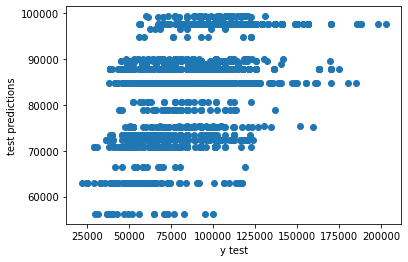

In [50]:

plt.scatter(y_test, test_pred)
plt.xlabel('y test')
plt.ylabel('test predictions')
plt.show()

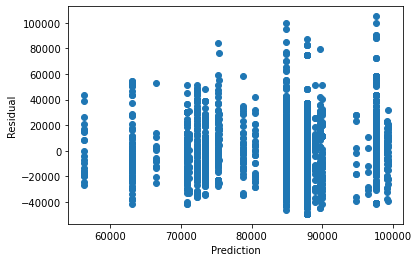

In [51]:
res = y_test - test_pred

plt.scatter(test_pred, res)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

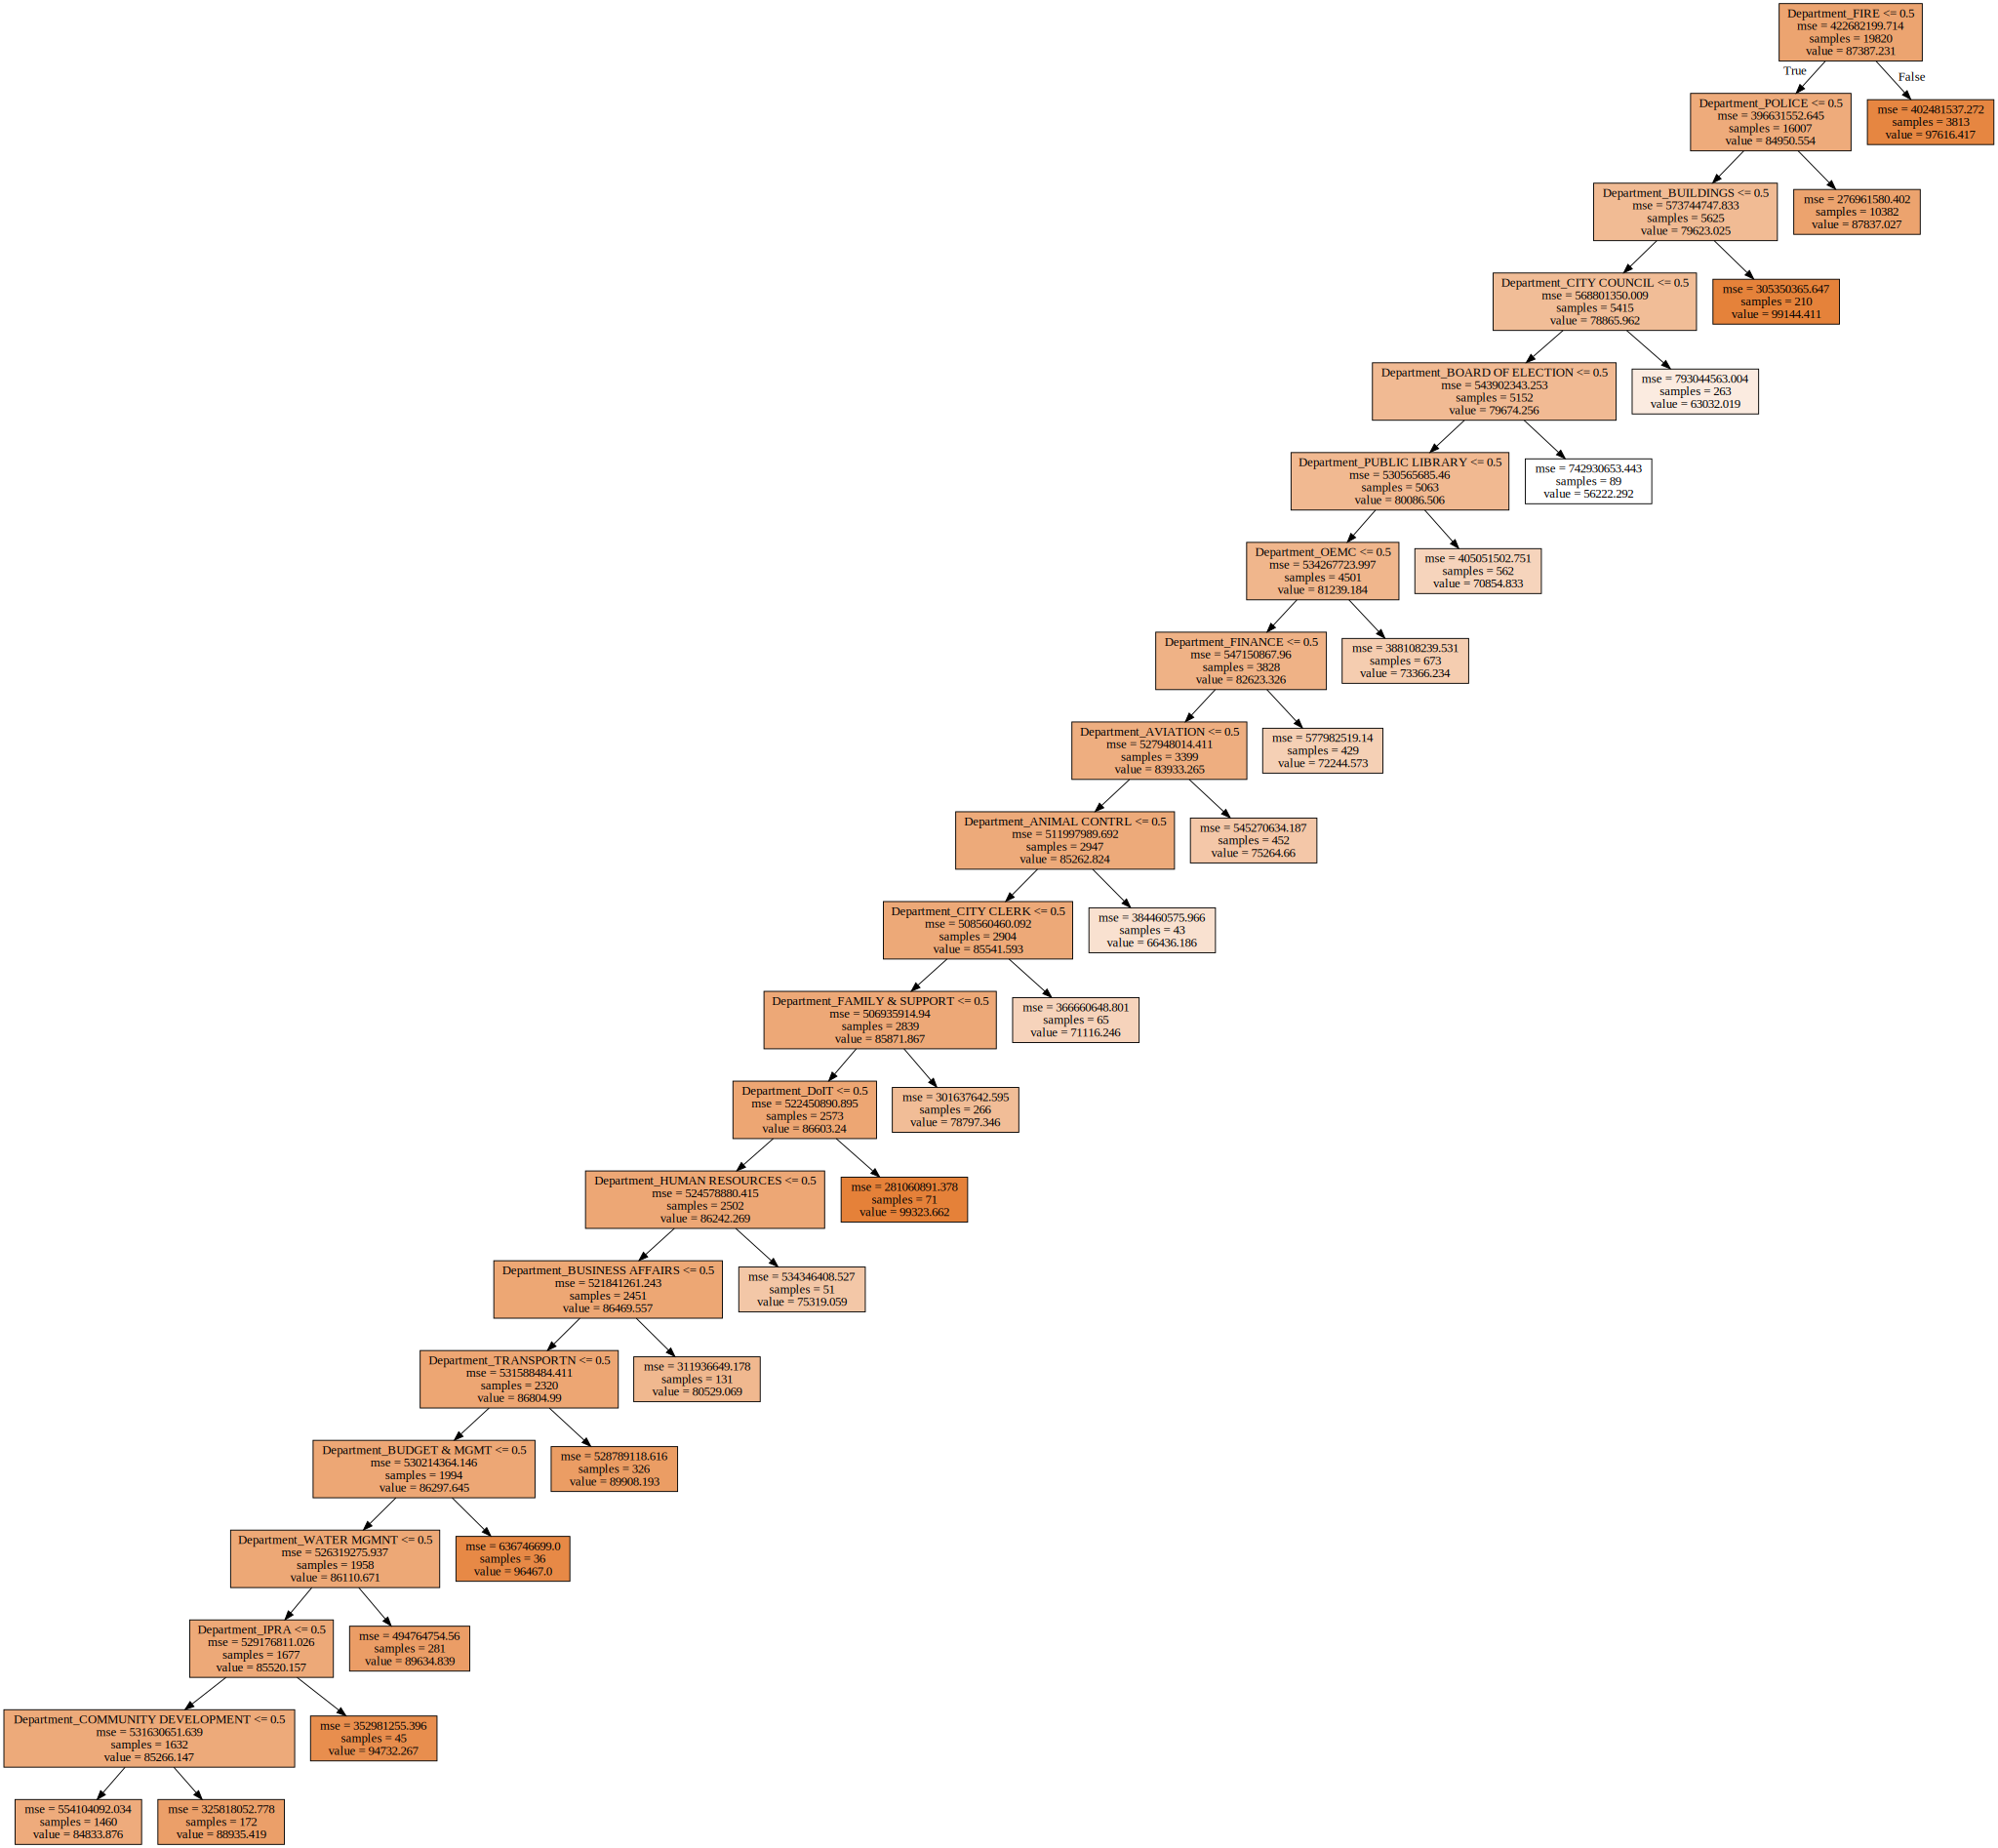

In [52]:
dot_data = export_graphviz(tree,
                     feature_names=X_train.columns,  
                     filled=True)  
graph = graphviz.Source(dot_data)  
graph